# **Análise de Sentimento**

In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')
nltk.download('punkt_tab') 
nltk.download('stopwords') 
import re

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\lucas\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\lucas\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\lucas\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [55]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

## **Dados**

In [3]:
df = pd.read_csv('C:/Estudos/Kaggle/10 - Analise de Sentimento/Dados/frases_emocoes_geradas.csv')
df

,frase,emocao
0,Hoje o dia está perfeito.,positiva
1,As folhas estão caindo.,neutra
2,Estou muito agradecido por tudo.,positiva
3,Ele saiu para caminhar.,neutra
4,Me diverti muito na festa!,positiva
...,...,...
995,Ele saiu para caminhar.,neutra
996,Estamos no mês de maio.,neutra
997,Hoje é terça-feira.,neutra
998,Ela comprou um novo livro.,neutra


# **Pré Processamento**

In [30]:
stop_words = list(stopwords.words('portuguese')) 

In [31]:
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'\d+', '', text)  # Remove numbers
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = re.sub(r'\s+', ' ', text)  # Remove extra whitespace
    tokens = word_tokenize(text) #Tokenize the text
    tokens = [word for word in tokens if word.isalpha()]  # Remove numeros e simbolos
    tokens = [word for word in tokens if word not in stop_words]  # Remove stopwords
    return ' '.join(tokens)

In [32]:
df['frase_processada'] = df['frase'].apply(preprocess_text)

In [33]:
print("\nFrases após pré-processamento:")
print(df[['frase', 'frase_processada']].head())


Frases após pré-processamento:
                              frase   frase_processada
0         Hoje o dia está perfeito.  hoje dia perfeito
1           As folhas estão caindo.      folhas caindo
2  Estou muito agradecido por tudo.    agradecido tudo
3           Ele saiu para caminhar.      saiu caminhar
4        Me diverti muito na festa!      diverti festa


## **Vetorização (TF-IDF)** 

In [34]:
vectorizer = TfidfVectorizer(
    stop_words=stop_words,
    lowercase=True,
    use_idf=True,
    smooth_idf=True,
    sublinear_tf=True
)

In [35]:
X = vectorizer.fit_transform(df['frase_processada'])
y = df['emocao'] 

In [38]:
print(f"\nDimensaõ da matriz TF-IDF: {X.shape}")


Dimensaõ da matriz TF-IDF: (1000, 62)


## **Divisão de Treino e Teste**

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [49]:
print(f"\nTamanho do conjunto de treino: {X_train.shape[0]} amostras")
print(f"\nTamanho do conjunto de teste: {X_test.shape[0]} amostras")


Tamanho do conjunto de treino: 800 amostras

Tamanho do conjunto de teste: 200 amostras


# **Modelo**

In [52]:
model = MultinomialNB().fit(X_train, y_train)

## **Avaliação do Modelo**

In [53]:
y_pred = model.predict(X_test)

In [58]:
classification = classification_report(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
confusion_matrix = confusion_matrix(y_test, y_pred)

In [63]:
print(f'\n Acurácia: {accuracy:.2f}')
print(f'\n Relatório de Classificação:\n {classification}')


 Acurácia: 1.00

 Relatório de Classificação:
               precision    recall  f1-score   support

    negativa       1.00      1.00      1.00        68
      neutra       1.00      1.00      1.00        66
    positiva       1.00      1.00      1.00        66

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



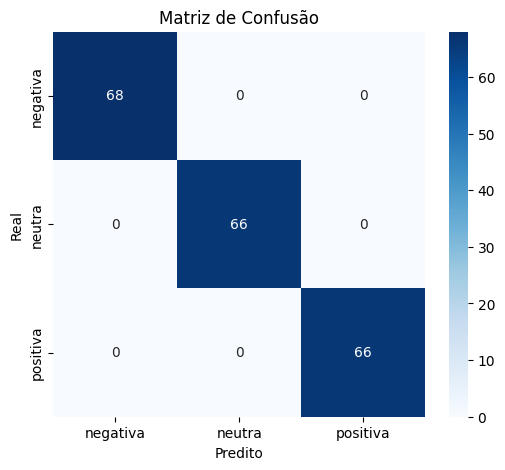

In [65]:
plt.figure(figsize=(6, 5))
sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Predito')
plt.ylabel('Real')
plt.title('Matriz de Confusão')
plt.show()